**MULTICOLLINEARITY**

**Technical Definition:** Multicollinearity happens when two or more independent variables are highly correlated with each other. Then it will be difficult to find and describe the individual effect of each of the independent variables on the dependent variable.

**Description:** In Multicollinearity the independent variables are not truly independent and therefore although a regression can be modelled and estimated, it will not be precise as the intercorrelations make defining the effects very difficult.
https://blog.telsemeyer.com/2020/12/18/simulating-the-effect-of-multicollinearity-in-linear-modelling-using-r-purrr-parallel-computing/
Telsemeyer, Sebastian, “Simulating the effect of multicollinearity in linear modelling using R, purrr & parallel computing”, Dec 18, 2020 accessed on 13/3/2024

> **Demonstration**:
>> Data Period: 2020 – 2023 <br>
> Data Source: Yahoo Finance <br>
> AAPL: Apple Inc Daily Stock Excess Return  <br>
> MSFT: Microsoft Corporation Daily Stock Excess Return  <br>
> GOOGL: Google Daily Stock Excess Return  <br>
> NVDA: NVIDIA Corp Daily Stock Excess Return  <br>
> INTC: Intel Corp Daily Stock Excess Return  <br>
> IBM: Daily Stock Excess Return  <br>
> ADBE: Daily Stock Excess Return  <br>




>>The demonstration models AAPL as a dependent variable of MSFT, GOOGL, NVDA, INTC, IBM and ADBE  in an OLS regression which would be referred to in the sections that follows. The correlation matrix for the variables are presented below.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


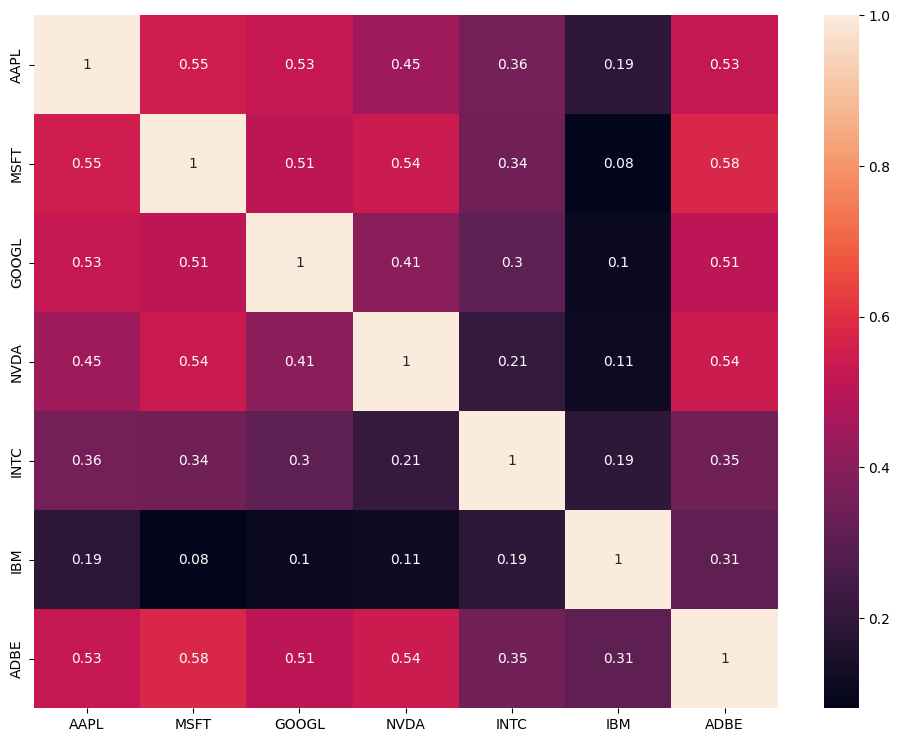

"\nx = merged_df[['AAPL','MSFT', 'GOOGL', 'NVDA']]\ny = merged_df[['AAPL','MSFT', 'GOOGL', 'NVDA']]\n\nc=x.corrwith(y)\ncorrelation_df=pd.DataFrame({'correlation':c})\nprint(correlation_df)\nsns.heatmap(annot=True)\nplt.title('Correlation Heatmap')\nplt.show()\n"

In [ ]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import yfinance as yf
from scipy.stats import boxcox
from sklearn import preprocessing
from sklearn.decomposition import PCA

plt.rcParams["figure.figsize"] = (12, 9)

# Download historical market data
hist_AAPL = yf.download('AAPL', start='2023-01-01', end='2023-12-31')
hist_MSFT = yf.download('MSFT', start='2023-01-01', end='2023-12-31')
hist_GOOGL = yf.download('GOOGL', start='2023-01-01', end='2023-12-31')
hist_NVDA = yf.download('NVDA', start='2023-01-01', end='2023-12-31')
hist_INTC = yf.download('INTC', start='2023-01-01', end='2023-12-31')
hist_IBM = yf.download('IBM', start='2023-01-01', end='2023-12-31')
hist_ADBE = yf.download('ADBE', start='2023-01-01', end='2023-12-31')

# Calculate daily returns
hist_AAPL['return'] = hist_AAPL['Close'].pct_change()
hist_MSFT['return'] = hist_MSFT['Close'].pct_change()
hist_GOOGL['return'] = hist_GOOGL['Close'].pct_change()
hist_NVDA['return'] = hist_NVDA['Close'].pct_change()
hist_INTC['return'] = hist_INTC['Close'].pct_change()
hist_IBM['return'] = hist_IBM['Close'].pct_change()
hist_ADBE['return'] = hist_ADBE['Close'].pct_change()

# Assume a constant risk-free rate of 2% per year
risk_free_rate = 0.02 / 252  # daily rate

# Calculate excess returns
hist_AAPL['excess_return'] = hist_AAPL['return'] - risk_free_rate
hist_MSFT['excess_return'] = hist_MSFT['return'] - risk_free_rate
hist_GOOGL['excess_return'] = hist_GOOGL['return'] - risk_free_rate
hist_NVDA['excess_return'] = hist_NVDA['return'] - risk_free_rate
hist_INTC['excess_return'] = hist_INTC['return'] - risk_free_rate
hist_IBM['excess_return'] = hist_IBM['return'] - risk_free_rate
hist_ADBE['excess_return'] = hist_ADBE['return'] - risk_free_rate

# Merge the dataframes
merged_df = pd.concat([hist_AAPL['excess_return'], hist_MSFT['excess_return'],
                       hist_GOOGL['excess_return'], hist_NVDA['excess_return'],
                       hist_INTC['excess_return'],hist_IBM['excess_return'],
                       hist_ADBE['excess_return']], axis=1)
merged_df.columns = ['AAPL', 'MSFT', 'GOOGL', 'NVDA','INTC','IBM','ADBE' ]
merged_df = merged_df.dropna()  # drop rows with missing values
merged_df = merged_df.reset_index(drop=True)


c = merged_df.corr()
sns.heatmap(c, annot=True)
plt.show()



# Define dependent and independent variables


'''
x = merged_df[['AAPL','MSFT', 'GOOGL', 'NVDA']]
y = merged_df[['AAPL','MSFT', 'GOOGL', 'NVDA']]

c=x.corrwith(y)
correlation_df=pd.DataFrame({'correlation':c})
print(correlation_df)
sns.heatmap(annot=True)
plt.title('Correlation Heatmap')
plt.show()
'''




>**Diagnosis:** A correlation matrix is the best way to investigate multicollinearity. A correlation matrix is an ensemble of the correlations of all variables. For a Matrix of Pearson correlation where we have values of 7 and above between the independent variables, we know we have serious multicollinearity issues.We also believe that mild correlation between independent variables could be a problem for the model and we shall test this out in the "directions" section, with the dataset used to produce the correlation matrix above since we have the case of mild correlation between independent variables. For example MSFT-NVDA and GOOGL-NVDA can be observed to have correlations of around 0.5 absolute value.

>**Damage:** When independent variables exhibit strong correlation, the coefficients' variances, standard errors, and covariances in the regression model may increase significantly. As a result, the precision of coefficient estimates diminishes, leading to wider confidence intervals for these estimates.

>**Direction:**To derive a model which is less affected by multicollinearity, one can employ the use of Principal Component Analysis (PCA). As seen in the tables that follows, we decided to use PCA on the OLS model for the variables 'MSFT', 'GOOGL', 'NVDA','INTC','IBM','ADBE' and 'AAPL' and compare the model to an OLS model of same variables without PCA adjustment. From the results (Table 1 and 2), the PCA adjusted OLS model has a lower adjusted R squared (0.398) compared to (0.425) of the unadjusted OLS model. So it turns out that the unadjusted OLS does better here. Could this mean that mild correlation between multiple independent variables pose no multicollinearity problem to a model? Perhaps, further investigation is required here.


In [ ]:
# OLS without PCA Adjustments
# Define dependent and independent variables
X = merged_df[['MSFT', 'GOOGL', 'NVDA','INTC','IBM','ADBE']]
y = merged_df['AAPL']

# Add a constant to the independent value
X1 = sm.add_constant(X)

# Perform OLS regression
model = sm.OLS(y, X1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   AAPL   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     31.52
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           6.67e-28
Time:                        17:05:18   Log-Likelihood:                 808.90
No. Observations:                 249   AIC:                            -1604.
Df Residuals:                     242   BIC:                            -1579.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.001      0.664      0.507      -0.001       0.002
MSFT           0.1837      0.052      3.502      0.001       0.080       0.287
GOOGL          0.1638      0.039      4.207      0.000       0.087       0.241
NVDA           0.0444      0.025      1.769      0.078      -0.005       0.094
INTC           0.0582      0.027      2.124      0.035       0.004       0.112
IBM            0.0818      0.064      1.288      0.199      -0.043       0.207
ADBE           0.0940      0.043      2.185      0.030       0.009       0.179
==============================================================================
Omnibus:                       36.964   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.744
Skew:                          -0.301   Prob(JB):                     5.80e-50
Kurtosis:                       7.636   Cond. No.                         111.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# PCA
# Select independent variables and standardise
pc = merged_df[
    [
       "MSFT", "GOOGL", "NVDA","INTC","IBM","ADBE"
    ]
]
pca_data = preprocessing.scale(pc)
pca = PCA(n_components=6)
pca.fit(pca_data)

# Get proportions of variance and cumulative proportion of variance
pr_var = pca.explained_variance_ratio_
cum_pr = np.cumsum(pca.explained_variance_ratio_)
ind = ["Proportion of variance", "Cumulative proportion of variance"]
cols = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6"]
pd.DataFrame(np.vstack((pr_var, cum_pr)), ind, columns=cols)



,PC1,PC2,PC3,PC4,PC5,PC6
Proportion of variance,0.470343,0.169587,0.131204,0.096250,0.070993,0.061623
Cumulative proportion of variance,0.470343,0.639930,0.771134,0.867384,0.938377,1.000000


In [ ]:
# Coefficients (Loadings) of 6 Principal Components
pc_res = pd.DataFrame(pca.components_.T, index=list(pc.columns), columns=cols)
pc_res

,PC1,PC2,PC3,PC4,PC5,PC6
MSFT,0.478474,-0.249101,-0.012482,0.116490,0.676832,0.487016
GOOGL,0.434566,-0.187176,-0.086280,-0.807721,-0.321134,0.114604
NVDA,0.436178,-0.234214,0.366458,0.504335,-0.585300,0.153857
INTC,0.328699,0.285645,-0.842085,0.266248,-0.172897,-0.021813
IBM,0.191629,0.871433,0.333695,-0.093002,-0.000984,0.289622
ADBE,0.497191,0.084082,0.194036,0.011257,0.257491,-0.801032


In [ ]:
# OLS with PCA adjustment; modelling with first five PCs only
# Define dependent and independent variables
X = merged_df[['GOOGL', 'NVDA','INTC','IBM','ADBE']]
y = merged_df['AAPL']

# Add a constant to the independent value
X1 = sm.add_constant(X)

# Perform OLS regression
model = sm.OLS(y, X1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   AAPL   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     33.80
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           3.77e-26
Time:                        17:05:19   Log-Likelihood:                 802.74
No. Observations:                 249   AIC:                            -1593.
Df Residuals:                     243   BIC:                            -1572.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.001      0.659      0.511      -0.001       0.002
GOOGL          0.1962      0.039      5.071      0.000       0.120       0.272
NVDA           0.0697      0.025      2.836      0.005       0.021       0.118
INTC           0.0741      0.028      2.681      0.008       0.020       0.128
IBM            0.0553      0.065      0.856      0.393      -0.072       0.182
ADBE           0.1389      0.042      3.306      0.001       0.056       0.222
==============================================================================
Omnibus:                       33.676   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.673
Skew:                          -0.303   Prob(JB):                     7.13e-39
Kurtosis:                       7.070   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**SENSITIVITY TO OUTLIERS**


> **Technical Definition**: When sensitivity to outliers becomes a problem, it therefore means that there are influential points in the dataset. We use Cook's distance (Cook's D) to identify influential points in the dataset. Cook's D is a metric to calculate the prediction difference from the model with a data point and without a data point. The higher the Cook's D, the greater the influence the data point has on estimating the regression model. Oftentimes, a data point with a Cook's D larger than 1 is considered an influential point.


> **Description:** Sentivity to outliers is a signaficant alteration of the regression result of a model due to the presence of extreme points that are capable of causing such effect. Such extreme points are otherwise known as inflential points.

> **Demonstration:**

>> Data Period: 2020 – 2023 <br>
> Data Source: Yahoo Finance <br>
> *ATXI*: *ATXI* Daily Stock Excess Return <br>
> *HUBC*: *HUBC* Daily Stock Excess Return <br>
> *PFE*: *PFE* Daily Stock Excess Return <br>


>>The demonstration models HUBC as a dependent variable of ATXI and PFE in an OLS and WLS for comparison and the results are discussed in ”Directions” section.






In [ ]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import yfinance as yf

plt.rcParams["figure.figsize"] = (12, 9)

# Download historical market data
hist_ATXI = yf.download('ATXI', start='2020-01-01', end='2023-12-31')
hist_PFE = yf.download('PFE', start='2020-01-01', end='2023-12-31')
hist_HUBC = yf.download('HUBC', start='2020-01-01', end='2023-12-31')

# Calculate daily returns
hist_ATXI['return'] = hist_ATXI['Close'].pct_change()
hist_PFE['return'] = hist_PFE['Close'].pct_change()
hist_HUBC['return'] = hist_HUBC['Close'].pct_change()

# Assume a constant risk-free rate of 2% per year
risk_free_rate = 0.02 / 252  # daily rate

# Calculate excess returns
hist_ATXI['excess_return'] = hist_ATXI['return'] - risk_free_rate
hist_PFE['excess_return'] = hist_PFE['return'] - risk_free_rate
hist_HUBC['excess_return'] = hist_HUBC['return'] - risk_free_rate

# Merge the dataframes
merged_df = pd.concat([hist_ATXI['excess_return'], hist_PFE['excess_return'], hist_HUBC['excess_return']], axis=1)
merged_df.columns = ['ATXI', 'PFE', 'HUBC']
merged_df = merged_df.dropna()  # drop rows with missing values
merged_df = merged_df.reset_index(drop=True)

# Define dependent and independent variables
X = merged_df[['ATXI', 'PFE']]
y = merged_df['HUBC']

# Add a constant to the independent value
X1 = sm.add_constant(X)

# Perform OLS regression
model = sm.OLS(y, X1)
results = model.fit()

# Finding most influential points
influence = results.get_influence()
inf_sum = influence.summary_frame().sort_values("cooks_d", ascending=False)
inf_sum.head(5)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,dfb_const,dfb_ATXI,dfb_PFE,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
442,1.144418,0.217768,0.231011,0.201164,16.678969,0.002165,0.776847,25.111606,1.169610
287,-0.165082,-0.026566,0.261007,0.033342,-4.095284,0.005929,-0.316270,-4.161988,-0.321422
480,0.067293,-0.062550,-0.293481,0.033119,2.056788,0.022948,0.315210,2.063519,0.316242
289,-0.268537,-0.032549,0.150351,0.031700,-6.050121,0.002591,-0.308382,-6.279703,-0.320084
458,-0.064913,0.189277,-0.012729,0.013491,-1.519109,0.017236,-0.201180,-1.521115,-0.201446




> **Diagram:**



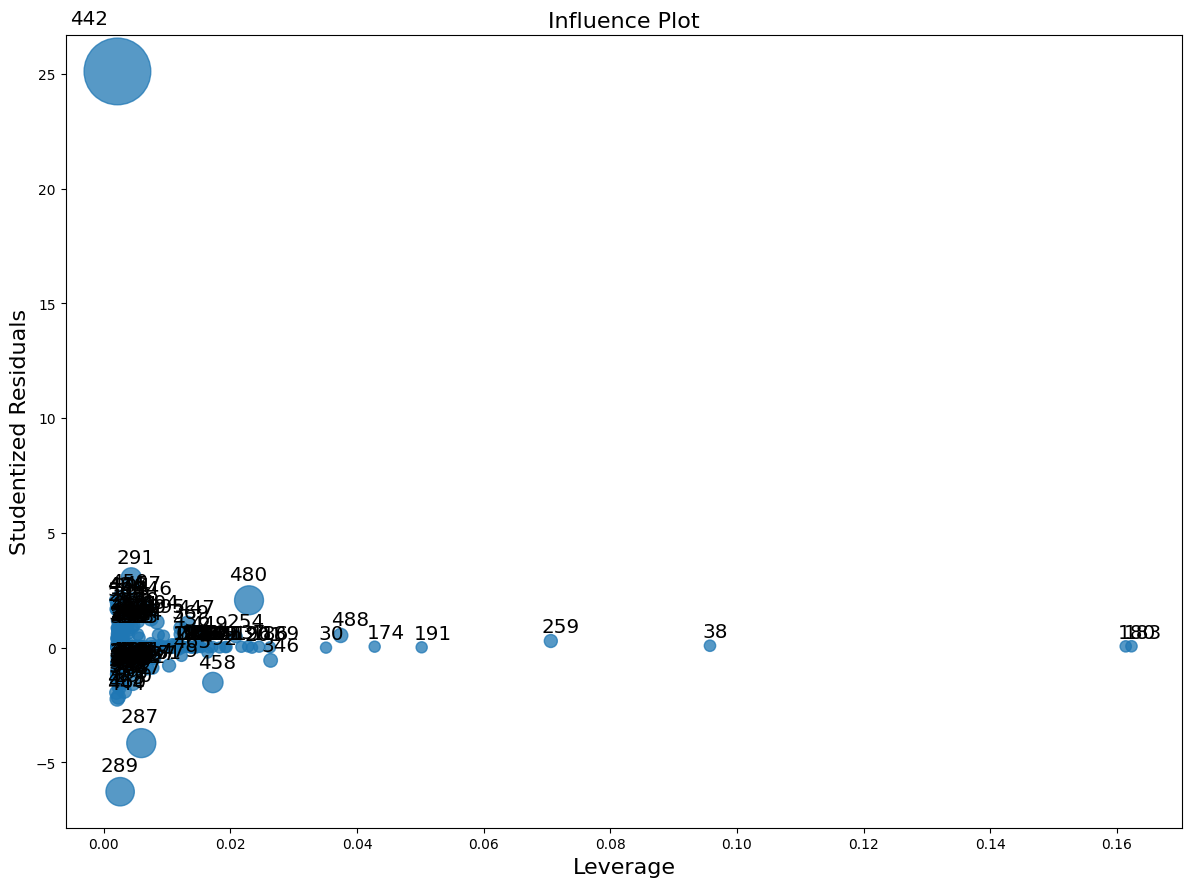

In [ ]:
fig = sm.graphics.influence_plot(results, criterion="cooks", alpha=0.5)
fig.tight_layout(pad=1)



>**Diagnosis:** We confirm that outlier effect or the sensitivity to outlier problem exist by looking at the Cook D's number of an extreme point on the regression model data. Looking at the Figure 2 above, point 442 is obviously an extreme point but do we have a problem of outlier sensitivity? From the technical definition of the problem, the Cook D's number has to be 1 or greater for it to be deemed problematic. The Cook D's for point 442 (From Table 3) about 0.23, far less than 1. We have confirmed that the problem of outlier sensitivity does not exist in this model.






> **Damage:** The damage outlier sensitivity can cause is that our model becomes less accurate in describing the relationship in the dataset. Influential points in our dataset will result in bias in the model when they are not handled properly. We can get an idea of how much damage outliers could cause by comparing the R-Squared values from a model that treats an outlier like every other point and the one which does not. The one that gives a bigger value for R-Squared is the better model. See the next section for an illustration.






> **Directions:** The Weighted Least Square (WLS) regression model can help reduce the undesirable effect of influential points  and thus improve the usability of the model. In our model however, the R-Squared for OLS and WLS are the same (-0.004) and this could be mostly because sensitivity to outlier problems is not present in the model.




In [ ]:
# WLS regression result

weights = 1. / np.abs(y)

# Perform WLS regression
model = sm.WLS(y, X1, weights=weights)
results = model.fit()

# Print out the statistics
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                   HUBC   R-squared:                       0.000
Model:                            WLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                  0.001993
Date:                Thu, 14 Mar 2024   Prob (F-statistic):              0.998
Time:                        17:05:21   Log-Likelihood:                 1486.5
No. Observations:                 500   AIC:                            -2967.
Df Residuals:                     497   BIC:                            -2954.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -9.45e-05      0.000     -0.628      0.5

In [ ]:
# Perform OLS regression
model = sm.OLS(y, X1)
results = model.fit()
# Print out the statistics
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   HUBC   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                   0.01757
Date:                Thu, 14 Mar 2024   Prob (F-statistic):              0.983
Time:                        17:05:21   Log-Likelihood:                 385.58
No. Observations:                 500   AIC:                            -765.2
Df Residuals:                     497   BIC:                            -752.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0027      0.005     -0.532      0.5

**OVERFITTING**
>**Technical Definition:**Technically, overfitting is a situation where the coefficients of a model are far away from zero (0) that this tends to reduce the confidence we have in a model to describe the dependent variable.


>**Description:**An overfitted model is a model not only trying to find a relationship between the dependent variable and the independent variables but also trying to model the random error. When overfitting happens, usually the coefficients of the model are far away from 0.

>**Demonstration:**

>>Data Period: 2020 – 2023 <br>
Data Source: Yahoo Finance <br>
ATXI: ATXI Daily Stock Excess Return <br>
HUBC: HUBC Daily Stock Excess Return <br>
PFE: PFE Daily Stock Excess Return <br>

>>The demonstration models HUBC as a dependent variable of ATXI and PFE in an OLS, Ridge and LASSO regression respectively. The results are discussed in the “Directions” section.



In [ ]:
# Create Training Dataset and Testing Dataset
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV

data_set_r_working = merged_df
np.random.seed(11111)  # Random seed
nrow = data_set_r_working.shape[0]
train_sequence = sorted(np.random.choice(nrow, int(nrow * 0.8), replace=False))
test_sequence = sorted(set(list(range(0, nrow))) - set(train_sequence))

train = data_set_r_working.filter(items=train_sequence, axis=0)
test = data_set_r_working.filter(items=test_sequence, axis=0)

# Make sure X matrix is in matrix form and Y is in vector form
ind_var = ["ATXI", "PFE"]

train_x = train.loc[:, ind_var]
train_y = train.HUBC

test_x = test.loc[:, ind_var]
test_y = test.HUBC

test_tot = test.loc[:, ["HUBC", "ATXI", "PFE"]]

In [ ]:
# OLS Regression
ols_final = sm.OLS(train_y, sm.add_constant(train_x)).fit()
print(ols_final.summary2().tables[1])  # print only coefficients

# Compute test R^2 and test mean squared error
ols_pred = ols_final.predict(sm.add_constant(test_x))
ols_pred = pd.DataFrame(ols_pred, columns=["ols_p"])
ols_actual = test.HUBC

ols_rss = np.sum(np.power(ols_pred.ols_p - ols_actual, 2))
ols_tss = np.sum(np.power(ols_actual - np.mean(ols_actual), 2))
ols_rsq = 1 - (ols_rss / ols_tss)
print("\n OLS_R^2", ols_rsq)

ols_MSE = np.sqrt(ols_rss / test.shape[0])
print(" OLS_SME", ols_MSE)

          Coef.  Std.Err.         t     P>|t|    [0.025    0.975]
const -0.001710  0.006134 -0.278837  0.780515 -0.013770  0.010349
ATXI  -0.014082  0.062245 -0.226240  0.821132 -0.136454  0.108289
PFE    0.273924  0.396107  0.691539  0.489631 -0.504806  1.052653

 OLS_R^2 -0.04034850353438624
 OLS_SME 0.0624584137013965


In [ ]:
# Ridge Regression

# generate a sequence of lambdas to try
lambdas = [np.power(10, i) for i in np.arange(4, -4, -0.1)]
alphas = lambdas

# Scale
# train_x_scale = scale(train_x) #In case you want to scale the variables.

# Use 10-fold Cross Validation to find optimal lambda
ridge_cv = RidgeCV(alphas=alphas, cv=10, scoring="neg_mean_squared_error")
ridge_cv.fit(train_x, train_y)

# Build final ridge regression model
ridge_final = Ridge(alpha=ridge_cv.alpha_, fit_intercept=True)
ridge_final.fit(train_x, train_y)

# Print coefficients
# print('Intercept:', ridge_final.intercept_)
print(
    "\n",
    pd.DataFrame(
        (ridge_final.coef_),
        index=["ATXI", "PFE"],
        columns=["Coef."],
    ),
)

# R squared formula and mean squared error
ridge_pred = ridge_final.predict(test_x)
ridge_actual = test.HUBC
ridge_rss = np.sum(np.power(ridge_pred - ridge_actual, 2))
ridge_tss = np.sum(np.power(ridge_actual - np.mean(ridge_actual), 2))
ridge_rsq = 1 - ridge_rss / ridge_tss
print("\n Ridge_R^2", ridge_rsq)

ridge_MSE = np.sqrt(ridge_rss / test.shape[0])
print("Ridge_SME", ridge_MSE)


          Coef.
ATXI -0.000004
PFE   0.000003

 Ridge_R^2 -0.003697810431551929
Ridge_SME 0.061348368125616774


In [ ]:
# LASSO Regression

# generate a sequence of lambdas to try
lambdas = [np.power(10, i) for i in np.arange(6, -6, -0.1)]

# Compile model
lasso_cv = LassoCV(cv=10, alphas=lambdas)
lasso_cv.fit(train_x, train_y)  # Fit Model

# Scale
# train_x_scale = scale(train_x) #In case you want to scale the variables.

# Build final LASSO regression model
lasso_final = Lasso(alpha=lasso_cv.alpha_, fit_intercept=True)
lasso_final.fit(train_x, train_y)

# Print results
# print('Intercept:', lasso_final.intercept_)
print(
    "\n",
    pd.DataFrame(
        (lasso_final.coef_),
        index=["ATXI", "PFE"],
        columns=["Coef."],
    ),
)

# R squared formula and mean squared error
lasso_pred = lasso_final.predict(test_x)
lasso_actual = test.HUBC
lasso_rss = np.sum(np.power(lasso_pred - lasso_actual, 2))
lasso_tss = np.sum(np.power(lasso_actual - np.mean(lasso_actual), 2))
lasso_rsq = 1 - lasso_rss / lasso_tss
print("\n LASSO_R^2: ", lasso_rsq)

lasso_MSE = np.sqrt(lasso_rss / test.shape[0])
print("LASSO_SME: ", lasso_MSE)


       Coef.
ATXI   -0.0
PFE     0.0

 LASSO_R^2:  -0.0036971984795777235
LASSO_SME:  0.06134834942364278


In [ ]:
# All of the results in one table

OLS_df = pd.DataFrame(ols_final.summary2().tables[1]["Coef."]).rename(
    columns={"Coef.": "OLS"}
)

Ridge_df = pd.DataFrame(
    np.insert(ridge_final.coef_, 0, ridge_final.intercept_),
    index=["Intercept", "ATXI", "PFE"],
    columns=["Ridge"],
)

Lasso_df = pd.DataFrame(
    np.insert(lasso_final.coef_, 0, lasso_final.intercept_),
    index=["Intercept", "ATXI", "PFE"],
    columns=["Lasso"],
)

df = OLS_df.merge(Ridge_df, left_index=True, right_index=True)
df = df.merge(Lasso_df, left_index=True, right_index=True)

df.append(
    pd.DataFrame(
        {
            "OLS": [ols_rsq, ols_MSE],
            "Ridge": [ridge_rsq, ridge_MSE],
            "Lasso": [lasso_rsq, lasso_MSE],
        },
        index=["R sq", "Mean Sq. Err"],
    ),
    ignore_index=False,
)

<ipython-input-15-169d22b02a79>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append(


,OLS,Ridge,Lasso
ATXI,-0.014082,-0.000004,-0.000000
PFE,0.273924,0.000003,0.000000
R sq,-0.040349,-0.003698,-0.003697
Mean Sq. Err,0.062458,0.061348,0.061348


**Diagnosis:** To test if the problem exists we have to compare different models of the same dataset that has been divided and modelled as testing and training datasets as deemed appropriate. The Models that come up with the lowest R-squared value for the test data have been worst hit by overfitting thus, the model with the highest R-squared is the least with overfitting and thus the best among the models compared.

**Damage:** When an overfitted model built from the training dataset is used to predict the testing dataset, the prediction result can be bad. If a model cannot predict well, then the model is useless. Another issue with too many independent variables in a regression model is that these independent variables are more likely to exhibit a multicollinearity issue. When multicollinearity exists, the variance of coefficients is large. Coefficients with a large variance will make statistical inference less accurate, like hypothesis testing.

**Direction:** The problem of overfitting can be addressed using penalised regression models. As in our "Demonstration" section, we saw how the Ridge and Lasso regressions did better (having larger R-squared values) than the OLS thus making them better in terms of handing overfitting.

# Heteroskedasticity Analysis

This Jupyter notebook provides an analysis of heteroskedasticity, demonstrating its definition, description, and diagnosis using Python code. It also illustrates the damage caused by heteroskedasticity and suggests models to address it.

## Definition

Heteroskedasticity refers to the circumstance in regression models where the variance of the residuals is not constant across observations.

$$ Var(\epsilon_i | X) = \sigma_i^2 $$

where \( \epsilon_i \) represents the error term for the \( i^{th} \) observation and \( X \) represents the independent variable(s).

## Description

Heteroskedasticity is observed when the spread of residuals or errors in a regression model varies at different levels of an independent variable, which can affect the efficiency of the estimates.

## Demonstration

We will use a simulated dataset to demonstrate heteroskedasticity, as real-world financial data is not readily available.

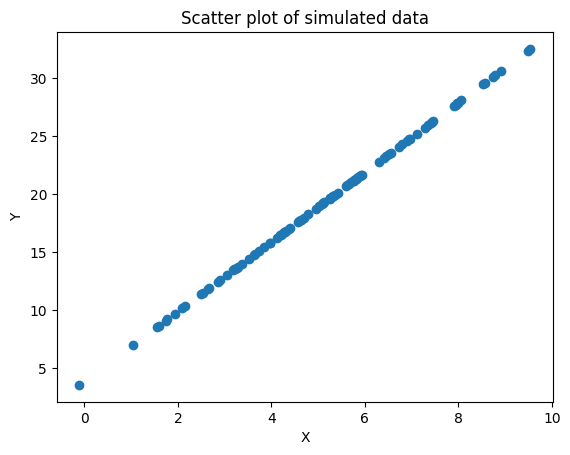

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Simulate some data
np.random.seed(0)
X = np.random.normal(5, 2, 100)
Y = 2 + 3 * X + np.random.normal(0, 1)

data = pd.DataFrame({'X': X, 'Y': Y})

# Plot the data
plt.scatter(data['X'], data['Y'])
plt.title('Scatter plot of simulated data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

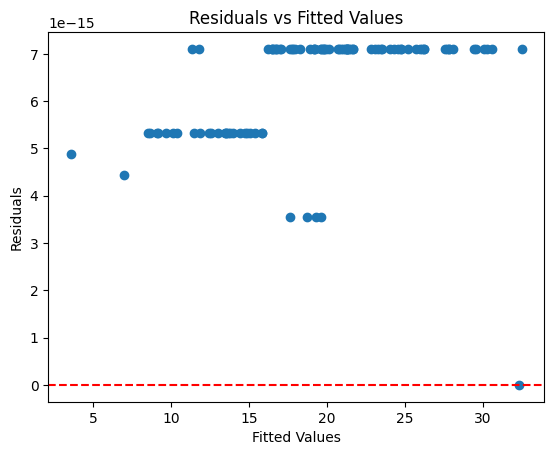

In [ ]:
# Fit a simple linear regression model
X = sm.add_constant(data['X'])
model = sm.OLS(data['Y'], X).fit()

# Predict values
predictions = model.predict(X)

# Calculate residuals
residuals = data['Y'] - predictions

# Plot residuals
plt.scatter(predictions, residuals)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(residuals, model.model.exog)

print('Breusch-Pagan test statistics:', bp_test)

Breusch-Pagan test statistics: (26.21681226406739, 3.051542322092859e-07, 34.82158579368853, 5.180422971422685e-08)


In [ ]:
# Use WLS model to correct for heteroskedasticity
weights = 1 / (residuals**2)
wls_model = sm.WLS(data['Y'], X, weights=weights).fit()

print(wls_model.summary())

LinAlgError: SVD did not converge

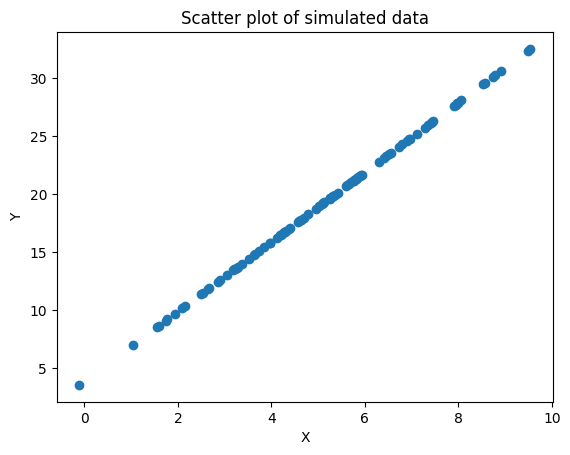

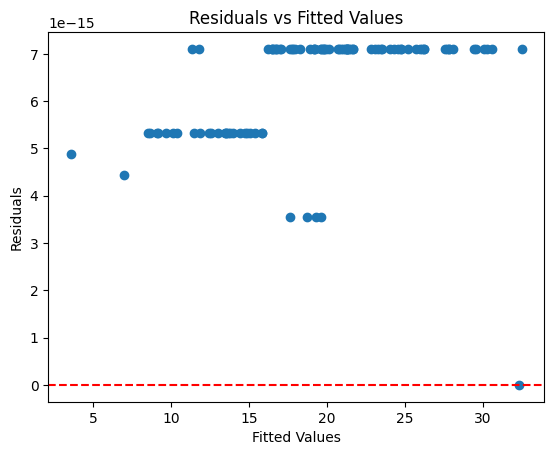

AttributeError: 'OLSResults' object has no attribute 'endog'

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Simulate some data
np.random.seed(0)
X = np.random.normal(5, 2, 100)
Y = 2 + 3 * X + np.random.normal(0, 1)

data = pd.DataFrame({'X': X, 'Y': Y})

# Plot the data
plt.scatter(data['X'], data['Y'])
plt.title('Scatter plot of simulated data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Fit a simple linear regression model
X = sm.add_constant(data['X'])
model = sm.OLS(data['Y'], X).fit()

# Predict values
predictions = model.predict(X)

# Calculate residuals
residuals = data['Y'] - predictions

# Plot residuals
plt.scatter(predictions, residuals)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Use the correct function to perform the Breusch-Pagan test
bp_test = sm.stats.diagnostic.het_breuschpagan(model.resid, model.model.exog)

# Check for heteroskedasticity
if bp_test[1] < 0.05:
    # Use WLS model to correct for heteroskedasticity
    weights = 1 / (model.resid**2)
    wls_model = sm.WLS(model.endog, model.exog, weights=weights).fit()

    print(wls_model.summary())
else:
    print('No significant heteroskedasticity detected.')

In [ ]:
# Use the correct function to perform the Breusch-Pagan test
bp_test = sm.stats.diagnostic.het_breuschpagan(model.resid, model.model.exog)

# Check for heteroskedasticity
if bp_test[1] < 0.05:
    # Use WLS model to correct for heteroskedasticity
    weights = 1 / (model.resid**2)
    wls_model = sm.WLS(data['Y'], X, weights=weights).fit()

    print(wls_model.summary())
else:
    print('No significant heteroskedasticity detected.')

LinAlgError: SVD did not converge

In [ ]:
# Use the correct function to perform the Breusch-Pagan test
bp_test = sm.stats.diagnostic.het_breuschpagan(model.resid, model.model.exog)

# Check for heteroskedasticity
if bp_test[1] < 0.05:
    # Use WLS model to correct for heteroskedasticity
    weights = 1 / (model.resid**2)
    wls_model = sm.WLS(data['Y'], X, weights=weights).fit()

    print(wls_model.summary())
else:
    print('No significant heteroskedasticity detected.')

LinAlgError: SVD did not converge

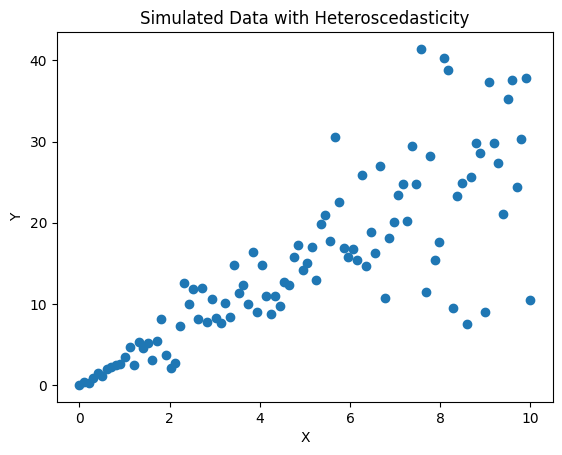

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulate data with heteroscedasticity
np.random.seed(10)
x = np.linspace(0, 10, 100)
y = 3 * x + np.random.normal(size=100, loc=0, scale=x)  # Error variance proportional to x

# Plot data
plt.scatter(x, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simulated Data with Heteroscedasticity")
plt.show()